In [1]:
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
# checking missing values 
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

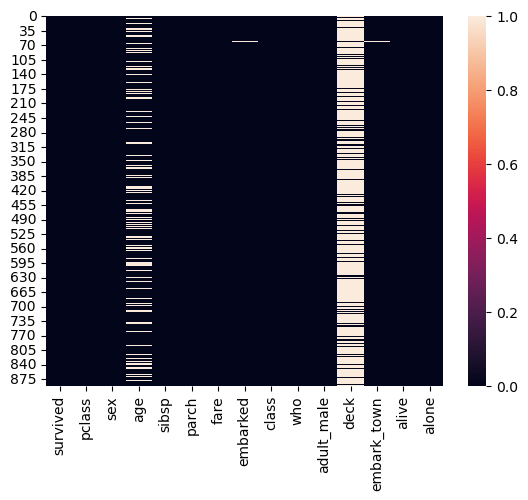

In [8]:
sns.heatmap(df.isna())

In [10]:
# Handling missing values by deletig the rows 
df.shape # initial shape of data 

(891, 15)

In [14]:
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [12]:
# after dropping the all rows our data has now only 183 rows remaining which means lots of useful data has lost 
# dropping the rows is not a good option but droping a column is also not a good option, because that can also lead to important data loss


(891, 15)

### Imputation Techniques

1-Mean value imputation

<AxesSubplot:xlabel='age', ylabel='Density'>

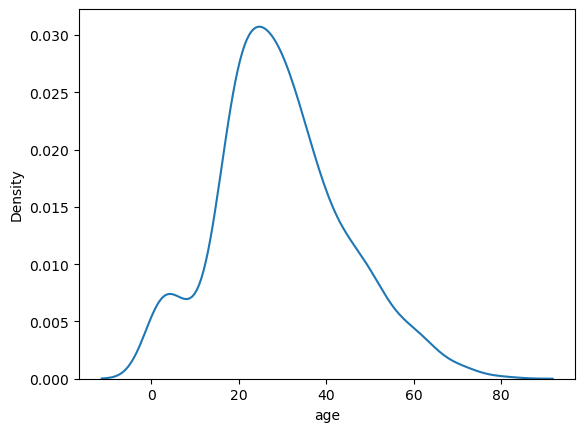

In [20]:
sns.kdeplot(df.age)

In [22]:
# This is quite like a normal distribution 
# so in  that case we can use imputation by mean values. If there are no outliers then only it is recommeded to use mean imputation 
# we are making a new column and will fill the none values 
df['Age_mean'] = df['age'].fillna(df['age'].mean())

In [26]:
# but if there are outlieres in the data then we will replace the NA values with the median data. In case of normally distributed data mean and
# mode are both the same 
df['Age_median'] = df['age'].fillna(df['age'].median())

- 2. Median Imputation

In [27]:
df[['age', 'Age_mean', 'Age_median']]

,age,Age_mean,Age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


- 3. Mode value Imputation
- This method we specifically use for categorical missing values 

In [31]:
df[df.embarked.isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [32]:
df.embarked.mode()

0    S
Name: embarked, dtype: object

In [33]:
df['embarked_mode'] = df.embarked.fillna(df['embarked'].mode())

In [34]:
df.embarked_mode

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked_mode, Length: 891, dtype: object

In [42]:
# but we need to check according to other features, like they both were womans and travelling into the first class 
filtered_df = df[df['class'] == 'First']

In [46]:
filtered_df['embarked'].mode() # this is a right approach 

0    S
Name: embarked, dtype: object

## Handling Imbalanced Dataset

##### There are two ways to handle the imbalanced data set
1. Upsampling 
2. Downsampling

In [14]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(100)



In [16]:

# this is just to create a number of data points 
# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

'loc': This parameter specifies the mean (average) of the normal distribution. In your code, it's set to 0, which means that the distribution is centered around zero. In a normal distribution, the mean is the point of highest probability, and it's the value around which most of the data points will cluster.

'scale': This parameter is the standard deviation of the normal distribution. It controls the spread or dispersion of the data points. A smaller 'scale' value makes the data points cluster closely around the mean, while a larger 'scale' value results in a wider spread of data points. In your code, it's set to 1, which means that the data points will have a standard deviation of 1 unit.

In [18]:


class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size= n_class_0), 
    'feature_2': np.random.normal(loc=0, scale= 1, size= n_class_0),
    'target': [0]*n_class_0
    })

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc = 2, scale = 1, size = n_class_1),
    'feature_2' : np.random.normal(loc= 2, scale = 1, size = n_class_1),
    'target': [1]*n_class_1
})

In [19]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [20]:
df

,feature_1,feature_2,target
0,-0.171891,-0.659589,0
1,-0.128731,-0.772246,0
2,-1.354740,0.111653,0
3,-0.104240,-1.305794,0
4,-0.545769,-0.892900,0
...,...,...,...
995,2.348063,2.392395,1
996,1.974300,0.667006,1
997,2.400290,0.860276,1
998,2.002915,3.580273,1


In [22]:
df.target.value_counts()  # we got an imbalance dataset here

0    900
1    100
Name: target, dtype: int64

In [23]:
# lets first do the upsampling 
# in upsampling the minority data points are increased equal to the majority data points 

## upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [24]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace= True, # this will make new data points and will replace previous one
                                  n_samples= len(df_majority), random_state=20)

In [28]:
df_minority_upsampled.target.value_counts()

1    900
Name: target, dtype: int64

In [29]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [32]:
df_upsampled.target.value_counts()

0    900
1    900
Name: target, dtype: int64

In [35]:
df_upsampled.shape

(1800, 3)

In [37]:
# Downsampling 

# We will reduce the number of datapoints from the majority data points 
# to do that we will reduce the number of data points from majority 


class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size= n_class_0), 
    'feature_2': np.random.normal(loc=0, scale= 1, size= n_class_0),
    'target': [0]*n_class_0
    })

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc = 2, scale = 1, size = n_class_1),
    'feature_2' : np.random.normal(loc= 2, scale = 1, size = n_class_1),
    'target': [1]*n_class_1
})

In [38]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [39]:
df.head()

,feature_1,feature_2,target
0,-0.214183,-0.075367,0
1,0.438865,0.901019,0
2,-1.079921,-0.021112,0
3,-0.956577,2.408530,0
4,-1.665854,1.275273,0


In [ ]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [48]:
df_majority_downsampled = resample(df_majority, replace= False, n_samples= len(df_minority), random_state=12)

In [49]:
df_majority_downsampled.target.value_counts()

0    100
Name: target, dtype: int64

In [50]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [51]:
df_downsampled.target.value_counts()

0    100
1    100
Name: target, dtype: int64